# EDA

## 1. Carga De Datos

Primero, nos encargamos de cargar las bases de datos que sí se han descargado de la página web. (Cambiar función para leer todas las bases de datos posibles.) Haremos un inner join y de esta manera obtendremos un conjunto de datos con todas las bases de datos que se han descargado.

In [1]:
import pandas as pd
import seaborn as sns
from fuzzywuzzy import process
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def load_datasets():
    ags_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_ags_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    cdmx_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_cdmx_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    chp_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_chp_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    cmp_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_cmp_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    col_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_col_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    dgo_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_dgo_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    edo_mch_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_edo_mch_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    edo_mex_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_edo_mex_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    edo_mex_df2 = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_edo_mex_convo_2.csv', encoding='cp1252', index_col=0, skiprows=1)
    edo_mex_df3 = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_edo_mex_convo_3.csv', encoding='cp1252', index_col=0, skiprows=1)
    edo_mor_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_edo_mor_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    gro_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_gro_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    hgo_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_hgo_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    jal_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_jal_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    mor_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_mor_convo_2.csv', encoding='cp1252', index_col=0, skiprows=1)
    oax_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_oax_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    pbl_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_pbl_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    qnro_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_qnro_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    qro_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_qro_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    txl_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_txl_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    vrz_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_vrz_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    yct_df = pd.read_csv('../../data/anexo_unico_i_1er_listado_autori_fertilizantes_23_yct_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    gro2_df = pd.read_csv('../../data/anexo_unico_i_2do_listado_autori_fertilizantes_23_gro_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    jal2_df = pd.read_csv('../../data/anexo_unico_i_2do_listado_autori_fertilizantes_23_jal_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)
    pbl2_df = pd.read_csv('../../data/anexo_unico_i_2do_listado_autori_fertilizantes_23_pbl_convo_1.csv', encoding='cp1252', index_col=0, skiprows=1)

    list = [ags_df, cdmx_df, chp_df, cmp_df, col_df, dgo_df, edo_mch_df, edo_mex_df, edo_mex_df2, edo_mex_df3, edo_mor_df, gro_df, hgo_df, jal_df, mor_df, oax_df, pbl_df, qnro_df, qro_df, txl_df, vrz_df, yct_df, gro2_df, jal2_df, pbl2_df]
    
    merged_df = pd.concat(list, join='inner', ignore_index=True)

    return merged_df

Cargamos el dataset de Inegi.

In [2]:
inegi_df = pd.read_csv('../../data/dataset_inegi.csv', encoding='cp1252', index_col=0)

In [3]:
inegi_df

,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
MAPA,,,,,,,,,,,,,,,,,,,
10010001,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259
10010094,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,R,"21°52´18.749N""","102°22´24.710W""",21.871874,-102.373530,1901,F13D18,5,*,*,2
10010096,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,R,"21°53´01.522N""","102°21´25.639W""",21.883756,-102.357122,1861,F13D18,41,24,17,12
10010100,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,R,"21°51´16.556N""","102°22´21.884W""",21.854599,-102.372745,1879,F13D18,0,0,0,0
10010102,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],R,"21°46´48.650N""","102°21´26.261W""",21.780180,-102.357295,1861,F13D18,8,*,*,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320580039,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,39,San Isidro,R,"21°29´11.130N""","103°20´14.164W""",21.486425,-103.337267,2036,F13D35,1,*,*,1
320580040,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,40,San José,R,"21°30´59.539N""","103°27´23.645W""",21.516539,-103.456568,1821,F13D25,0,0,0,0
320580041,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,41,San Miguel Tepetitlán,R,"21°30´15.168N""","103°20´09.356W""",21.504213,-103.335932,1977,F13D25,97,47,50,31


In [4]:
df = load_datasets()
df

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2
1,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2
2,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2
3,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2
4,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2
...,...,...,...,...,...,...,...
1525715,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2
1525716,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2
1525717,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2
1525718,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2


## 2. Análisis del problema

### 2.1 Estructura de los datos

Comencemos por ver como ha quedado el principio y final de nuestro dataset, si la union no ha sido correcta podremos verlos aquí.

In [5]:
df.head()

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2
1,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2
2,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2
3,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2
4,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2


In [6]:
df.tail()

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
1525715,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2
1525716,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2
1525717,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2
1525718,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2
1525719,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103374-S000-PL,NaN,NaN,NaN,2


### 2.2 Información general 
Siempre es importante entender nuestras variables un poco mejor.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525720 entries, 0 to 1525719
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ESTADO            1525720 non-null  object
 1   MUNICIPIO         1450208 non-null  object
 2   ACUSE             1525720 non-null  object
 3   APELLIDO PATERNO  1521426 non-null  object
 4   APELLIDO MATERNO  1497507 non-null  object
 5   NOMBRE (S)        1521427 non-null  object
 6   PAQUETE           1525720 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 81.5+ MB


Habrá que cambiar el tipo de las variables para que salgan con la implementacion que nos han pedido.

### 2.3 Estadísticas descriptivas

Changes in the types of variables need to be made.

In [8]:
df.describe()

,PAQUETE
count,1.525720e+06
mean,1.463099e+00
std,4.986366e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.000000e+00


# 3. Limpieza de datos

### 3.1 Valores nulos o faltantes

In [9]:
df.isna().sum()

ESTADO                  0
MUNICIPIO           75512
ACUSE                   0
APELLIDO PATERNO     4294
APELLIDO MATERNO    28213
NOMBRE (S)           4293
PAQUETE                 0
dtype: int64

In [10]:
(df == 0).sum()

ESTADO              0
MUNICIPIO           0
ACUSE               0
APELLIDO PATERNO    0
APELLIDO MATERNO    0
NOMBRE (S)          0
PAQUETE             0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
84,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000688-S000-AS,CORTEZ,NaN,AMELIA,2
141,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000662-S000-AS,DIAZ,NaN,CONSUELO,2
295,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000309-S000-AS,HERNANDEZ,NaN,MA. TERESA,2
443,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000190-S000-AS,MARTINEZ,NaN,AGUSTIN,2
518,AGUASCALIENTES,AGUASCALIENTES,23-PRONAFE-FERT-000568-S000-AS,ORTEGA,NaN,ROMALDO,2
...,...,...,...,...,...,...,...
1525715,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2
1525716,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2
1525717,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2
1525718,PUEBLA,ZOQUITLAN,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2


Si no hay nombre del productor acreditado lo quitamos. También en el caso de que no haya apellido paterno. Un valor sin nombre y apellido no tiene uso práctico alguno.

In [12]:
df = df.dropna(subset=['NOMBRE (S)'])
df = df.dropna(subset=['APELLIDO PATERNO'])

In [13]:
df.isna().sum()

ESTADO                  0
MUNICIPIO           75512
ACUSE                   0
APELLIDO PATERNO        0
APELLIDO MATERNO    23920
NOMBRE (S)              0
PAQUETE                 0
dtype: int64

### 3.2 Valores duplicados

In [14]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 7)

In [15]:
# Remove duplicates
df = df.drop_duplicates()

In [16]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 7)

No hemos encontrado duplicados en este caso. En caso de que los hayan serán eliminados.

### 3.3 Corrección del tipo de datos

In [17]:
df.dtypes

ESTADO              object
MUNICIPIO           object
ACUSE               object
APELLIDO PATERNO    object
APELLIDO MATERNO    object
NOMBRE (S)          object
PAQUETE              int64
dtype: object

In [18]:
df = df.astype({
    'ESTADO' : 'string',
    'MUNICIPIO' : 'string',
    'ACUSE' : 'string',
    'APELLIDO PATERNO' : 'string',
    'APELLIDO MATERNO' : 'string',
    'NOMBRE (S)' : 'string',
})

In [19]:
df.dtypes

ESTADO              string
MUNICIPIO           string
ACUSE               string
APELLIDO PATERNO    string
APELLIDO MATERNO    string
NOMBRE (S)          string
PAQUETE              int64
dtype: object

# 3.4 Formatear strings

Necesitamos que los strings de ESTADO y MUNCIPIO esten de forma concreta para hacer esto dividirimos el proceso en dos pasos.

### 3.4.1 Limpieza general

In [20]:
def clean_text(text):
    text = text.str.strip()  # Eliminar espacios en blanco
    text = text.str.lower()  # Convertir a minúsculas
    text = text.str.replace('\s+', ' ')  # Eliminar espacios en blanco extras
    text = text.str.replace('^\s+|\s+?$', '')  # Eliminar espacios al inicio y al final
    return text

In [21]:
columns_to_clean = ['ESTADO', 'MUNICIPIO'] 

In [22]:
for col in columns_to_clean:
    df[col] = clean_text(df[col])

/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_50667/3846824655.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\s+', ' ')  # Eliminar espacios en blanco extras
/var/folders/ng/n9ng0wy92t90_49j662nh02c0000gn/T/ipykernel_50667/3846824655.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('^\s+|\s+?$', '')  # Eliminar espacios al inicio y al final


In [23]:
df['ESTADO'] = df['ESTADO'].str.title()
df['MUNICIPIO'] = df['MUNICIPIO'].str.title()

De esta manera tenemos el texto sin espacios blancos extra y sobre todo con todas las palabras con capitalización correcta.

### 3.4.2 Ortografía

Necesitamos que los estados y municipios de nuestro dataset estén escritos igual que en el dataset de Inegi (en el cual están escritos sin faltas de ortografía), para luego poder hacer el map del cve_ent y cve_mun.

In [24]:
# Get unique values in df
unique_estado_df = df['ESTADO'].unique()
unique_municipio_df = df['MUNICIPIO'].unique()

# Get unique values in inegi_df
unique_nom_ent_inegi = inegi_df['NOM_ENT'].unique()
unique_nom_mun_inegi = inegi_df['NOM_MUN'].unique()

In [25]:
unique_estado_df_list = list(unique_estado_df)
unique_municipio_df_list = list(unique_municipio_df)
unique_nom_ent_inegi_list = list(unique_nom_ent_inegi)
unique_nom_mun_inegi_list = list(unique_nom_mun_inegi)

# Create a DataFrame
unique_values_df = pd.DataFrame({
    'ESTADO': pd.Series(unique_estado_df_list),
    'MUNICIPIO': pd.Series(unique_municipio_df_list),
    'NOM_ENT': pd.Series(unique_nom_ent_inegi_list),
    'NOM_MUN': pd.Series(unique_nom_mun_inegi_list)
})

Creamos dataset con valores únicos de las 4 variables de arriba.

In [26]:
unique_values_df.head(50)

,ESTADO,MUNICIPIO,NOM_ENT,NOM_MUN
0,Aguascalientes,Aguascalientes,Aguascalientes,Aguascalientes
1,Ciudad De Mexico,Asientos,Baja California,Asientos
2,Chiapas,Calvillo,Baja California Sur,Calvillo
3,Campeche,Cosio,Campeche,Cosío
4,Colima,El Llano,Coahuila de Zaragoza,Jesús María
5,Durango,Jesus Maria,Colima,Pabellón de Arteaga
6,Michoacan De Ocampo,Pabellon De Arteaga,Chiapas,Rincón de Romos
7,Mexico,Rincon De Romos,Chihuahua,San José de Gracia
8,México,San Francisco De Los Romo,Ciudad de México,Tepezalá
9,Morelos,San Jose De Gracia,Durango,El Llano


In [27]:
# Create dictionaries for mapping
estado_to_nom_ent = {estado: process.extractOne(estado, unique_values_df['NOM_ENT'].tolist())[0] 
                     for estado in df['ESTADO'].unique() if isinstance(estado, str)}

municipio_to_nom_mun = {municipio: process.extractOne(municipio, unique_values_df['NOM_MUN'].tolist())[0] 
                        for municipio in df['MUNICIPIO'].unique() if isinstance(municipio, str) and pd.notna(municipio)}
# Replace the values in the original DataFrame
df['ESTADO'] = df['ESTADO'].map(estado_to_nom_ent)
df['MUNICIPIO'] = df['MUNICIPIO'].map(municipio_to_nom_mun)

Aquí hemos creado los diccionarios para mapear estos valores utilizando la biblioteca Fuzzywuzzy, que utiliza la Distancia de Levenshtein para calcular las diferencias entre secuencias (en este caso, cadenas de texto).

In [28]:
df['ESTADO'].unique()

array(['Aguascalientes', 'Ciudad de México', 'Chiapas', 'Campeche',
       'Colima', 'Durango', 'Michoacán de Ocampo', 'México', 'Morelos',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Oaxaca', 'Puebla',
       'Quintana Roo', 'Veracruz de Ignacio de la Llave', 'Tlaxcala',
       'Yucatán'], dtype=object)

In [29]:
df['MUNICIPIO'].unique()

array(['Aguascalientes', 'Asientos', 'Calvillo', ..., 'Yaxcabá',
       'Yaxkukul', 'Yobaín'], dtype=object)

## 4. Análisis univariado

### 4.1 Variables numéricas 

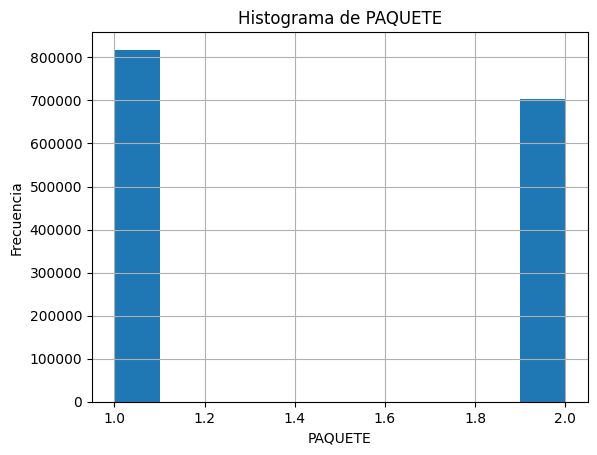

In [30]:
variable_numerica = 'PAQUETE'
if variable_numerica in df.columns:
    df[variable_numerica].hist()
    plt.xlabel(variable_numerica)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + variable_numerica)
    plt.show()
else:
    print(f"La variable numérica '{variable_numerica}' no se encuentra en el dataframe.")

### 4.2 Variables categóricas

## 5. Detección de outliers

### 5.1 IQR 

<Axes: xlabel='PAQUETE'>

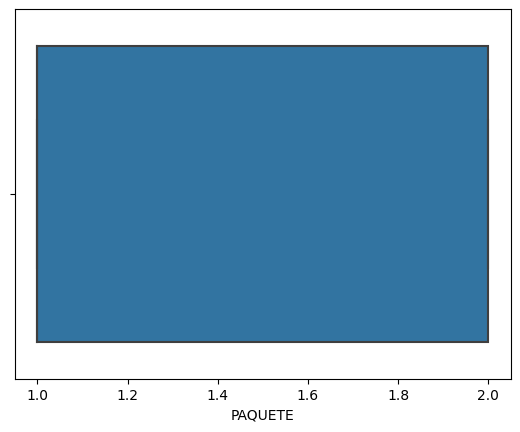

In [31]:
sns.boxplot(x=df["PAQUETE"])

In [32]:
Q1 = df['PAQUETE'].quantile(0.25)
Q3 = df['PAQUETE'].quantile(0.75)
IQR = Q3 - Q1  

In [33]:
ol1 = df[df['PAQUETE'] < (Q1-1.5 * IQR)].shape[0] + df[df['PAQUETE'] > (Q3 + 1.5 * IQR)].shape[0]
ol1

0

### 5.2 Decisiones sobre outliers

En este caso podemos ver que la única variable numérica no tiene outliers con lo cual continuamos.

## 6. Análisis multivariado

### 6.1 Matriz de correlación

### 6.2 Bivariado: numérico vs numérico

### 6.3 Bivariado: numérico vs categórico

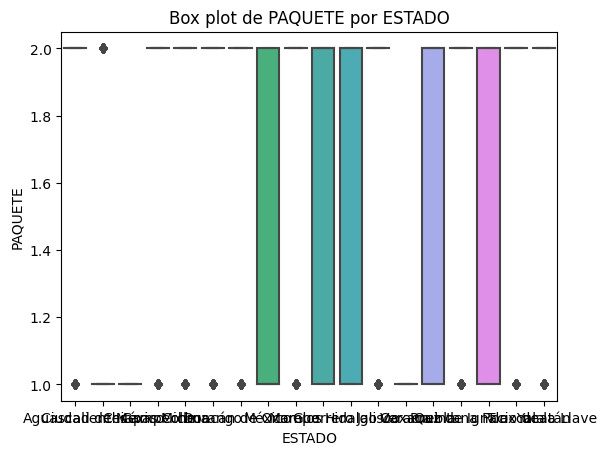

In [34]:
variable_numerica = 'PAQUETE'
variable_categorica = 'ESTADO'

if variable_numerica in df.columns and variable_categorica in df.columns:
    sns.boxplot(x=variable_categorica, y=variable_numerica, data=df)
    plt.xlabel(variable_categorica)
    plt.ylabel(variable_numerica)
    plt.title(f'Box plot de {variable_numerica} por {variable_categorica}')
    plt.show()
else:
    print("Al menos una de las variables no se encuentra en el dataframe.")

## 7. Inteligencia artificial aplicada

### 7.1 Clustering

## 8. Dowload dataset

In [35]:
df.reset_index(level=0, inplace=True)

In [36]:
df

,index,ESTADO,MUNICIPIO,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,0,Aguascalientes,Aguascalientes,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2
1,1,Aguascalientes,Aguascalientes,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2
2,2,Aguascalientes,Aguascalientes,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2
3,3,Aguascalientes,Aguascalientes,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2
4,4,Aguascalientes,Aguascalientes,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2
...,...,...,...,...,...,...,...,...
1521421,1521422,Puebla,Santiago Miahuatlán,23-PRONAFE-FERT-075885-S000-PL,VAZQUEZ,NIETO,JOSE MANUEL,2
1521422,1521423,Puebla,Santiago Miahuatlán,23-PRONAFE-FERT-075894-S000-PL,ZENTENO,CRUZ,ANGEL DAVID,2
1521423,1521424,Puebla,Santo Tomás Hueyotlipan,23-PRONAFE-FERT-075946-S000-PL,GONZALEZ,ROMERO,SABINA,1
1521424,1521425,Puebla,Santo Tomás Hueyotlipan,23-PRONAFE-FERT-075947-S000-PL,GONZALEZ,ZAYAS,MIRIAM,2


In [37]:
df.to_csv('../../data/productores_autorizados_fertilizantes.csv', index=False)